In [14]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Driver [C:\Users\mamoo\.wdm\drivers\chromedriver\win32\92.0.4515.107\chromedriver.exe] found in cache


In [3]:
# Visit the mars nasa news site
url = 'https://redplanetscience.com'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

True

In [4]:
html = browser.html
news_soup = soup(html, 'html.parser')
slide_elem = news_soup.select_one('div.list_text')

In [5]:
slide_elem.find('div', class_='content_title')

<div class="content_title">Hear Audio From NASA's Perseverance As It Travels Through Deep Space</div>

In [6]:
# Use the parent element to find the first `a` tag and save it as `news_title`
news_title = slide_elem.find('div', class_='content_title').get_text()
news_title

"Hear Audio From NASA's Perseverance As It Travels Through Deep Space"

In [7]:
# Use the parent element to find the paragraph text
news_p = slide_elem.find('div', class_='article_teaser_body').get_text()
news_p

"The first to be rigged with microphones, the agency's latest Mars rover picked up the subtle sounds of its own inner workings during interplanetary flight."

### Featured Images

In [8]:
# Visit URL
url = 'https://spaceimages-mars.com'
browser.visit(url)

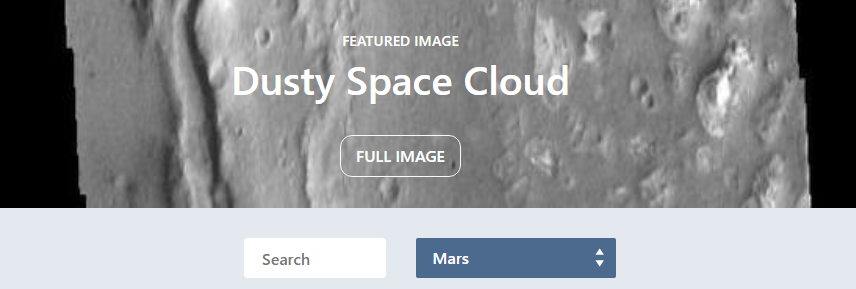

In [9]:
# <button class="btn btn-outline-light"> FULL IMAGE</button>

In [10]:
# Find and click the full image button
full_image_elem = browser.find_by_tag('button')[1]
full_image_elem.click()

In [11]:
# Parse the resulting html with soup
html = browser.html
img_soup = soup(html, 'html.parser')

The `src` will be different every time the page is updated. We'll use the image tag and class (`<img />`and `fancybox-img`) to build the URL to the full-size image.

In [12]:
# Find the relative image url
img_url_rel = img_soup.find('img', class_='fancybox-image').get('src')
img_url_rel

'image/featured/mars1.jpg'

In [13]:
# Use the base URL to create an absolute URL
img_url = f'https://spaceimages-mars.com/{img_url_rel}'
img_url

'https://spaceimages-mars.com/image/featured/mars1.jpg'

### Scrape info from "Mars Facts"

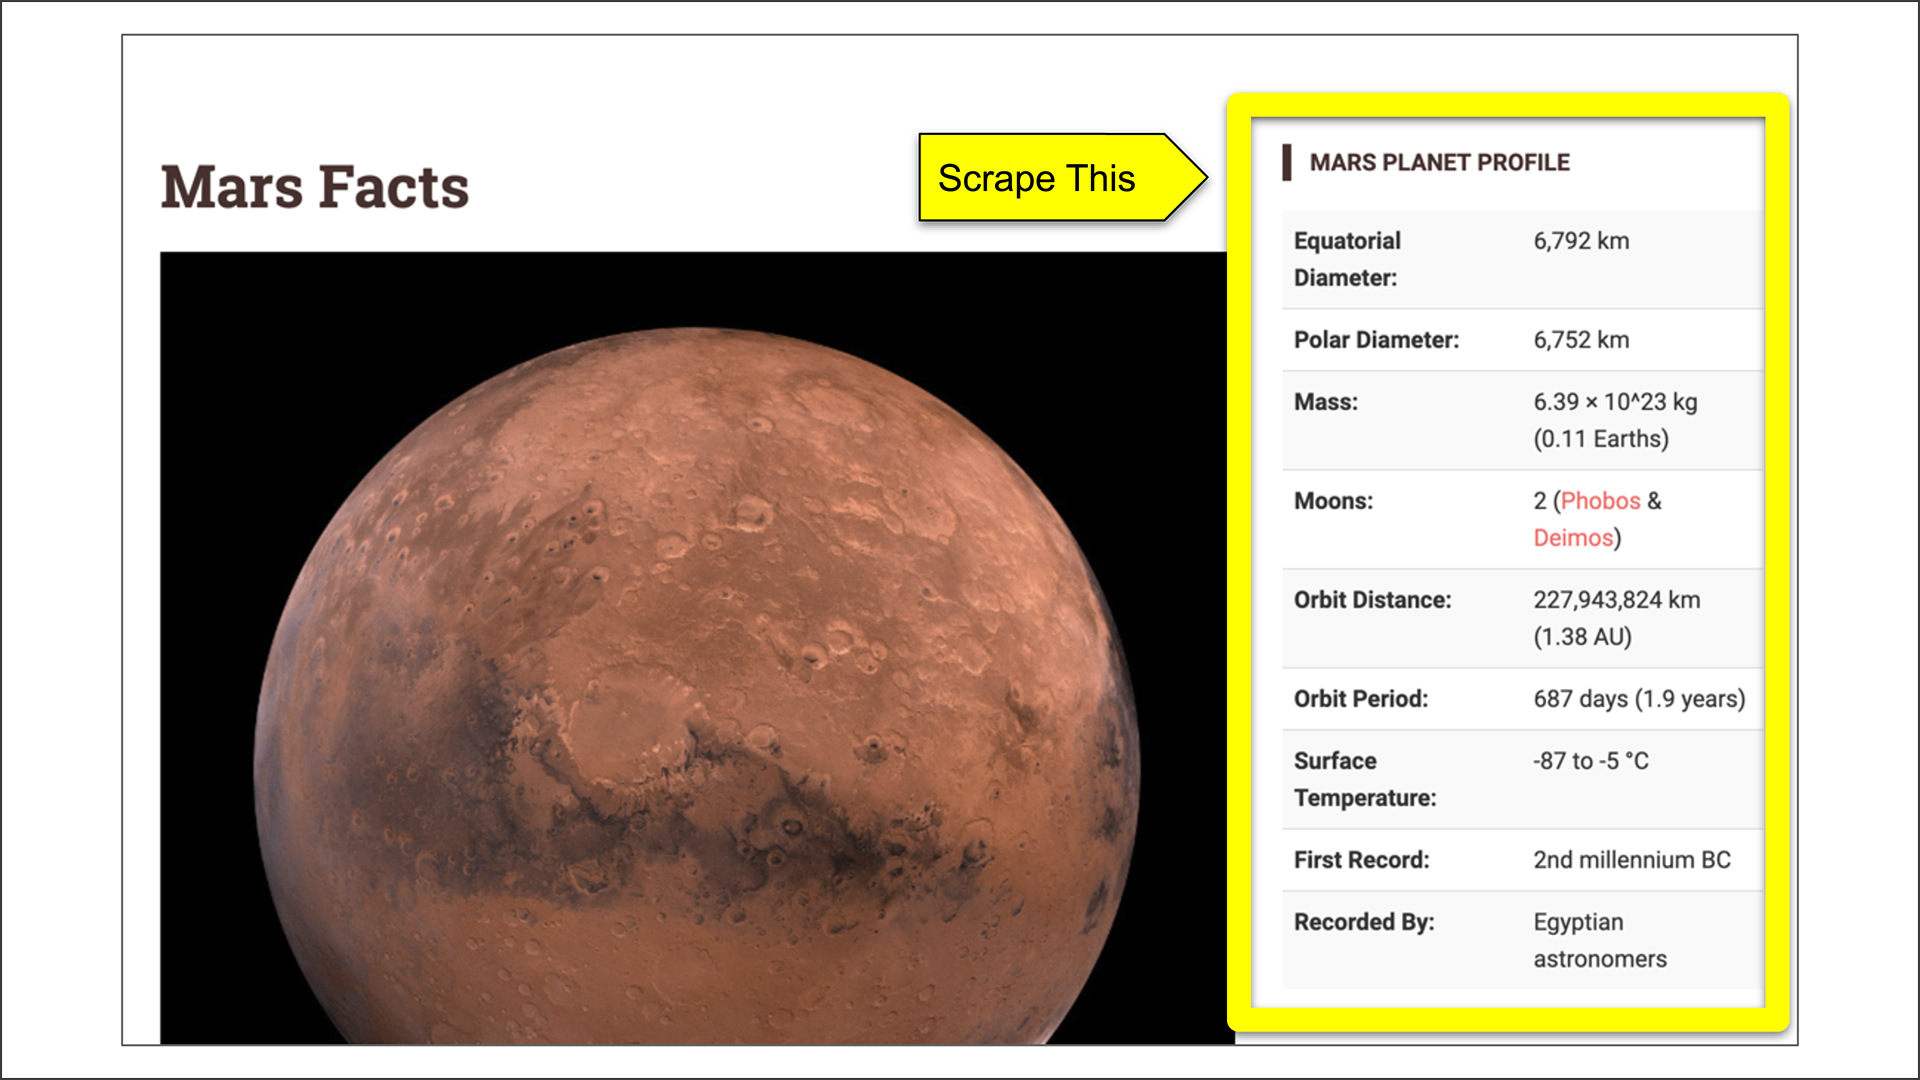

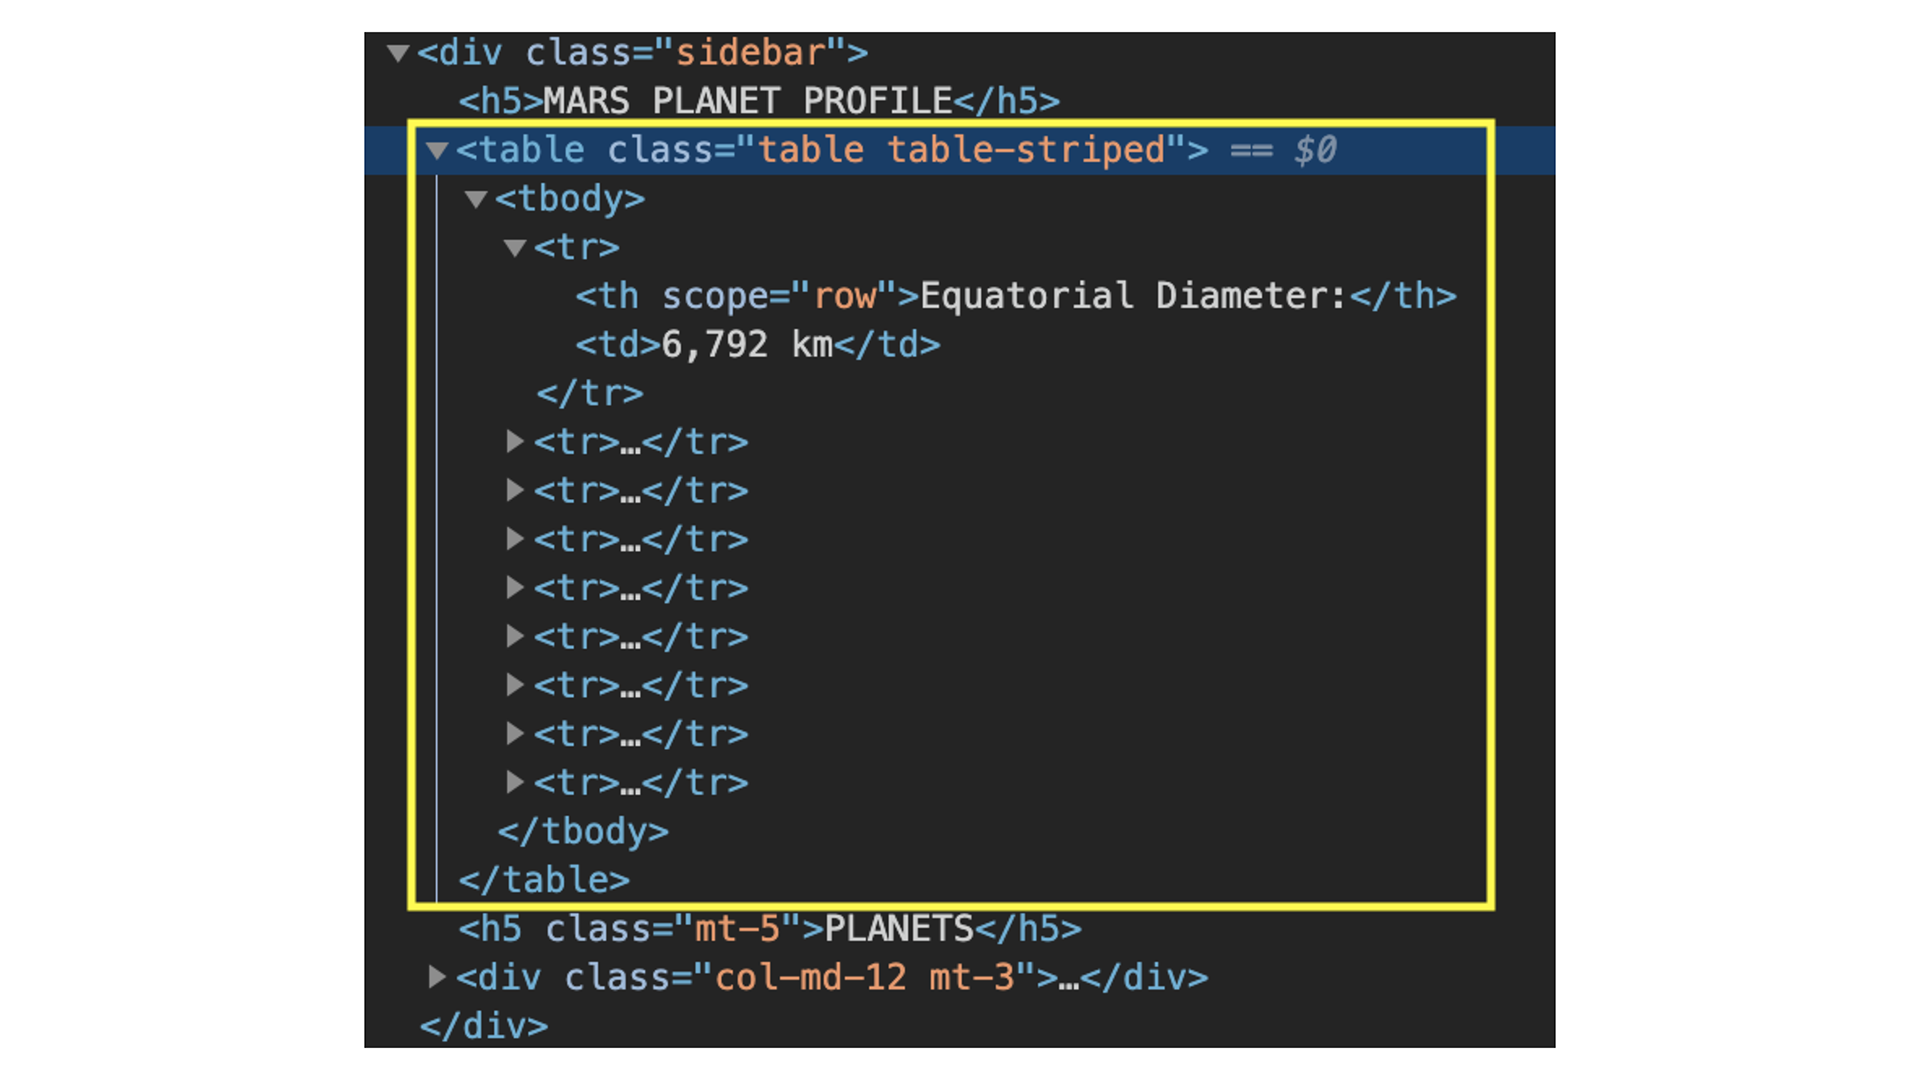

Instead of scraping each row, or the data in each <td />, we're going to scrape the entire table with Pandas' `.read_html()` function.

In [15]:
df = pd.read_html('https://galaxyfacts-mars.com')[0]

# assign columns to the new DataFrame 'df'
df.columns=['description', 'Mars', 'Earth']

# By using the .set_index() function, we're turning the Description column 
# into the DataFrame's index. inplace=True means that the updated index 
# will remain in place, without having to reassign the df to a new variable.
df.set_index('description', inplace=True)
df

,Mars,Earth
description,,
Mars - Earth Comparison,Mars,Earth
Diameter:,"6,779 km","12,742 km"
Mass:,6.39 × 10^23 kg,5.97 × 10^24 kg
Moons:,2,1
Distance from Sun:,"227,943,824 km","149,598,262 km"
Length of Year:,687 Earth days,365.24 days
Temperature:,-87 to -5 °C,-88 to 58°C


The function `read_html()` specifically searches for and returns a list of tables found in the HTML. By specifying an index of `[0]`, we're telling Pandas to pull only the first table it encounters

In [16]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Mars</th>\n      <th>Earth</th>\n    </tr>\n    <tr>\n      <th>description</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Mars - Earth Comparison</th>\n      <td>Mars</td>\n      <td>Earth</td>\n    </tr>\n    <tr>\n      <th>Diameter:</th>\n      <td>6,779 km</td>\n      <td>12,742 km</td>\n    </tr>\n    <tr>\n      <th>Mass:</th>\n      <td>6.39 × 10^23 kg</td>\n      <td>5.97 × 10^24 kg</td>\n    </tr>\n    <tr>\n      <th>Moons:</th>\n      <td>2</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>Distance from Sun:</th>\n      <td>227,943,824 km</td>\n      <td>149,598,262 km</td>\n    </tr>\n    <tr>\n      <th>Length of Year:</th>\n      <td>687 Earth days</td>\n      <td>365.24 days</td>\n    </tr>\n    <tr>\n      <th>Temperature:</th>\n      <td>-87 to -5 °C</td>\n      <td>-88 to 58°C</td>\n    </tr>\n  </tbody>

In [17]:
browser.quit()